<a href="https://colab.research.google.com/github/JdJ1n/offenseval/blob/master/offenseval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning to download classes

In [ ]:
!git clone https://github.com/JdJ1n/offenseval.git
%cd offenseval
%matplotlib inline

fatal: destination path 'offenseval' already exists and is not an empty directory.
/content/offenseval


## Imports

In [ ]:
import nltk
nltk.download(['stopwords','punkt','wordnet','averaged_perceptron_tagger'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from DataReader import DataReader
from Preprocessor import Preprocessor
from Vectorizer import Vectorizer
from Classifier import Classifier
from DeepLearning import DeepLearner
from sklearn.model_selection import train_test_split as split
import numpy as np

# Subtask A

## Reading data and splitting

In [ ]:
dr = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','A')
data,labels = dr.get_labelled_data()
data,labels = dr.shuffle(data,labels,'random')

tr_data,tst_data,tr_labels,tst_labels = split(data,labels,test_size=0.3)

Reading Data: 13241it [00:00, 280877.47it/s]


## Initializing objects

In [ ]:
preprocessors = [('lemmatize'),('remove_stopwords','lemmatize'),
        ('remove_stopwords','stem'),('remove_stopwords','lemmatize'),
        ('remove_stopwords','lemmatize'),('remove_stopwords')]

vectorizers = ['count','count','count','tfidf','tfidf']

classifiers = [
    ('M-NaiveBayes', {'alpha':5, 'fit_prior':True}),
    ('DecisionTree', {'criterion':'gini', 'max_depth':10, 'min_samples_split':2}),
    ('RandomForest', {'n_estimators':30}),
    ('SVC', {'C':3, 'kernel':'rbf'}),
    ('MLP', {'hidden_layer_sizes':(100,), 'activation':'relu', 'solver':'adam'})
]

for i in range(len(vectorizers)):
  preprocessors[i] = Preprocessor(preprocessors[i])
  vectorizers[i] = Vectorizer(vectorizers[i])
  classifiers[i] = Classifier(*classifiers[i])

## Training classifiers

In [ ]:
tst_vecs = []
tr_vecs = []
for i in range(len(classifiers)):
  tr_data_clean = preprocessors[i].clean(tr_data)
  tst_data_clean = preprocessors[i].clean(tst_data)

  tr_vecs.append(vectorizers[i].vectorize(tr_data_clean))
  tst_vecs.append(vectorizers[i].vectorize(tst_data_clean))

  classifiers[i].fit(tr_vecs[i],tr_labels)

## Testing and plotting

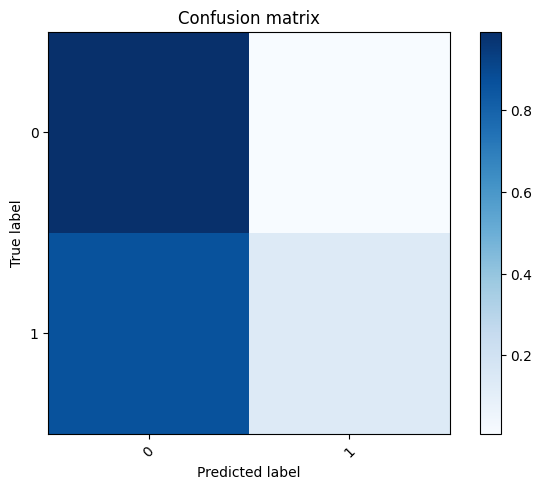

0.7137462235649547 ABCMeta {'alpha': 5, 'fit_prior': True}


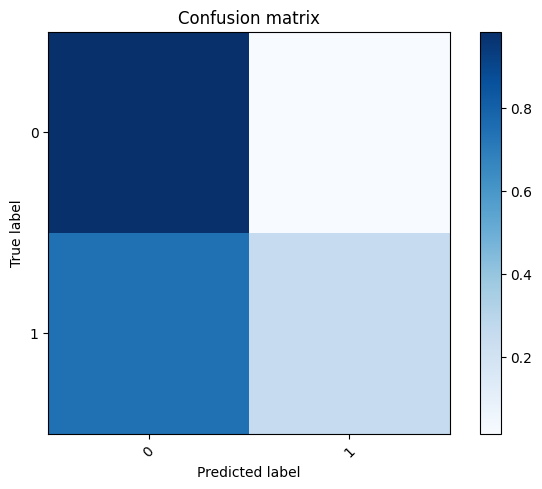

0.7484894259818731 ABCMeta {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


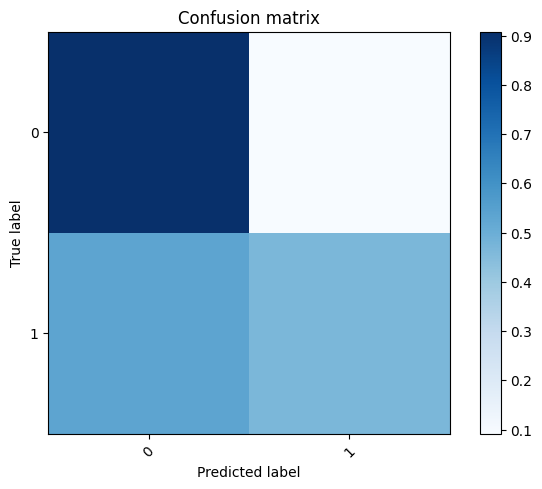

0.7648539778449144 ABCMeta {'n_estimators': 30}


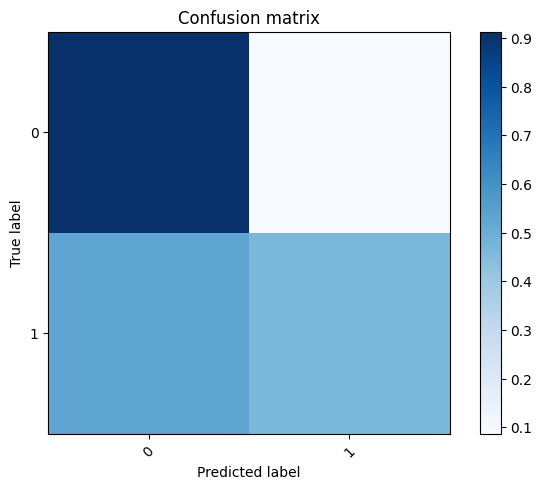

0.7681268882175226 ABCMeta {'C': 10, 'kernel': 'rbf'}


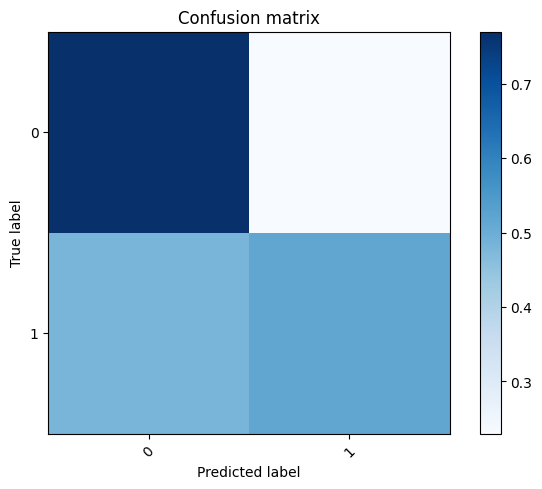

0.6880664652567976 ABCMeta {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam'}


[0.7137462235649547,
 0.7484894259818731,
 0.7648539778449144,
 0.7681268882175226,
 0.6880664652567976]

In [ ]:
accs = []
for i,clf in enumerate(classifiers):
  acc = clf.test_and_plot(tst_vecs[i],tst_labels,class_num=2)
  print(acc,clf.classifier.__class__.__name__,clf.params)
  accs.append(acc)

accs

# Subtask B

## Reading data and splitting

In [ ]:
dr_b = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','B')
data_b,labels_b = dr_b.get_labelled_data()
data_b,labels_b = dr_b.shuffle(data_b,labels_b,'random')

tr_data_b,tst_data_b,tr_labels_b,tst_labels_b = split(data_b,labels_b,test_size=0.3)

Reading Data: 13241it [00:00, 208164.30it/s]


## Initializing objects

In [ ]:
preprocessors_b = [('lemmatize'),('remove_stopwords','lemmatize'),
        ('remove_stopwords','stem'),('remove_stopwords','lemmatize'),
        ('remove_stopwords','lemmatize'),('remove_stopwords')]

vectorizers_b = ['count','count','count','tfidf','glove']

classifiers_b = [('RandomForest',{'n_estimators':30}),
               ('LogisticRegression',{'penalty':'l2','solver':'sag'}),
              ('M-NaiveBayes',{'alpha':5,'fit_prior':True}),
              ('KNN',{'n_neighbors':5}),('SVC',{'C':10,'kernel':'rbf'})]

for i in range(len(vectorizers_b)):
  preprocessors_b[i] = Preprocessor(preprocessors_b[i])
  vectorizers_b[i] = Vectorizer(vectorizers_b[i])
  classifiers_b[i] = Classifier(*classifiers_b[i])

## Training classifiers

In [ ]:
tst_vecs_b = []
tr_vecs_b = []
for i in range(len(classifiers_b)):
  tr_data_clean_b = preprocessors_b[i].clean(tr_data_b)
  tst_data_clean_b = preprocessors_b[i].clean(tst_data_b)

  tr_vecs_b.append(vectorizers_b[i].vectorize(tr_data_clean_b))
  tst_vecs_b.append(vectorizers_b[i].vectorize(tst_data_clean_b))

  classifiers_b[i].fit(tr_vecs_b[i],tr_labels_b)

Finalizing: 100%|██████████| 3080/3080 [00:01<00:00, 2512.79it/s]



Loading Glove Embeddings from api...


Finalizing: 100%|██████████| 1320/1320 [00:00<00:00, 2660.21it/s]


## Testing and plotting

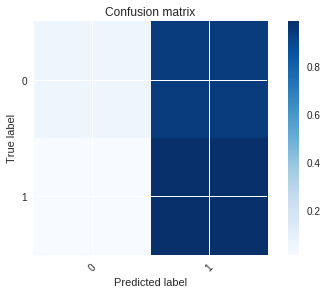

0.8787878787878788 RandomForestClassifier {'n_estimators': 30}


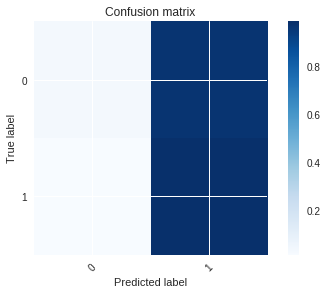

0.8757575757575757 LogisticRegression {'penalty': 'l2', 'solver': 'sag'}


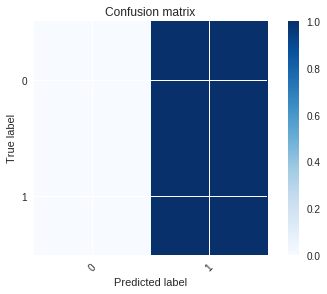

0.884090909090909 MultinomialNB {'alpha': 5, 'fit_prior': True}


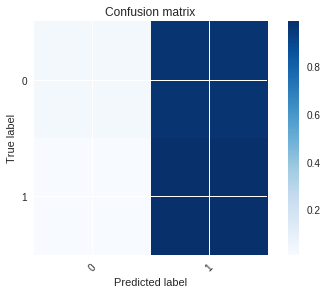

0.878030303030303 KNeighborsClassifier {'n_neighbors': 5}


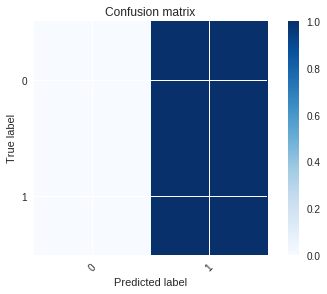

0.8833333333333333 SVC {'C': 10, 'kernel': 'rbf'}


[0.8787878787878788,
 0.8757575757575757,
 0.884090909090909,
 0.878030303030303,
 0.8833333333333333]

In [ ]:
accs_b = []
for i,clf in enumerate(classifiers_b):
  acc = clf.test_and_plot(tst_vecs_b[i],tst_labels_b,class_num=2)
  print(acc,clf.classifier.__name__,clf.params)
  accs_b.append(acc)

accs_b

# Subtask C

## Reading data and splitting

In [ ]:
dr_c = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','C')
data_c,labels_c = dr_c.get_labelled_data()
data_c,labels_c = dr_c.shuffle(data_c,labels_c,'random')

tr_data_c,tst_data_c,tr_labels_c,tst_labels_c = split(data_c,labels_c,test_size=0.3)

Reading Data: 13241it [00:00, 214260.61it/s]


## Initializing objects

In [ ]:
preprocessors_c = [('lemmatize'),('remove_stopwords','lemmatize'),
        ('remove_stopwords','stem'),('remove_stopwords','lemmatize'),
        ('remove_stopwords','lemmatize'),('remove_stopwords')]

vectorizers_c = ['count','count','count','tfidf','glove']

classifiers_c = [('RandomForest',{'n_estimators':30}),
               ('LogisticRegression',{'penalty':'l2','solver':'sag'}),
              ('M-NaiveBayes',{'alpha':5,'fit_prior':True}),
              ('KNN',{'n_neighbors':5}),('SVC',{'C':10,'kernel':'rbf'})]

for i in range(len(vectorizers_c)):
  preprocessors_c[i] = Preprocessor(preprocessors_c[i])
  vectorizers_c[i] = Vectorizer(vectorizers_c[i])
  classifiers_c[i] = Classifier(*classifiers_c[i])

## Training classifiers

In [ ]:
tst_vecs_c = []
tr_vecs_c = []
for i in range(len(classifiers_c)):
  tr_data_clean_c = preprocessors_c[i].clean(tr_data_c)
  tst_data_clean_c = preprocessors_c[i].clean(tst_data_c)

  tr_vecs_c.append(vectorizers_c[i].vectorize(tr_data_clean_c))
  tst_vecs_c.append(vectorizers_c[i].vectorize(tst_data_clean_c))

  classifiers_c[i].fit(tr_vecs_c[i],tr_labels_c)

## Testing and plotting

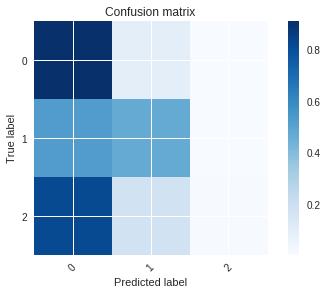

0.70335339638865 RandomForestClassifier {'n_estimators': 30}


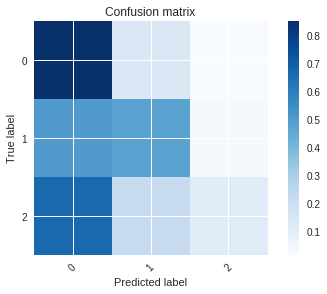

0.6775580395528805 LogisticRegression {'penalty': 'l2', 'solver': 'sag'}


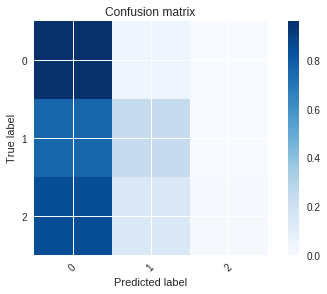

0.6715391229578676 MultinomialNB {'alpha': 5, 'fit_prior': True}


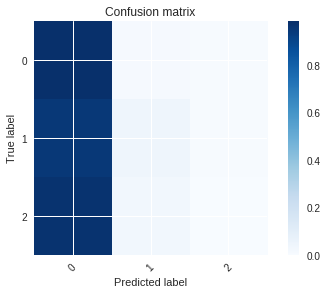

0.6319862424763543 KNeighborsClassifier {'n_neighbors': 5}


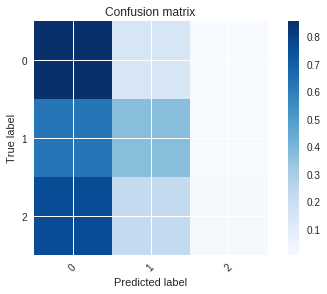

0.641444539982803 SVC {'C': 10, 'kernel': 'rbf'}


[0.70335339638865,
 0.6775580395528805,
 0.6715391229578676,
 0.6319862424763543,
 0.641444539982803]

In [ ]:
accs_c = []
for i,clf in enumerate(classifiers_c):
  acc = clf.test_and_plot(tst_vecs_c[i],tst_labels_c,class_num=3)
  print(acc,clf.classifier.__name__,clf.params)
  accs_c.append(acc)

accs_c

# Neural Nets

## Subtask A

### Reading data and cleaning

In [ ]:
dr_nn = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','A')
data_nn,labels_nn = dr_nn.get_labelled_data()
data_nn,labels_nn = dr_nn.shuffle(data_nn,labels_nn,'random')

tr_data_nn,tst_data_nn,tr_labels_nn,tst_labels_nn = split(data_nn,labels_nn,test_size=0.3)

prp = Preprocessor('remove_stopwords','lemmatize')
tr_data_clean_nn = prp.clean(tr_data_nn)
tst_data_clean_nn = prp.clean(tst_data_nn)

vct = Vectorizer('count')
vct.vectorize(tr_data_clean_nn)

### Training LSTM

In [ ]:
lstm = DeepLearner(tr_data_clean_nn,tr_labels_nn,vocab_length=vct.vocab_length,model_type='LSTM')
lstm.train(epochs=60)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 44, 30)            386370    
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               184800    
_________________________________________________________________
dense_5 (Dense)              (None, 44)                8844      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 90        
Total params: 580,104
Trainable params: 580,104
Non-trainable params: 0
_________________________________________________________________
Train on 7414 samples, validate on 1854 samples
Epoch 1/60
7414/7414 [==============================] - 18s 2ms/step - loss: 4.1223 - acc: 0.6658 - val_loss: 0.6438 - val_acc: 0.6634
Epoch 2/60
7414/7414 [==============================] - 16s 2ms/step - loss: 0.6370 -

### Testing LSTM and plotting

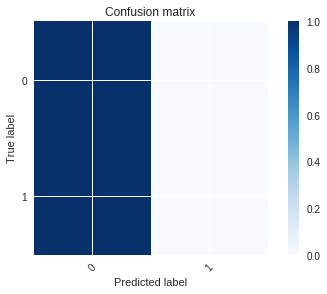

3972/3972 [==============================] - 2s 524us/step
LSTM (['loss', 'acc'], [0.6355910050905003, 0.6681772406847936])


In [ ]:
acc = lstm.test_and_plot(tst_data_clean_nn,tst_labels_nn)
print('LSTM',acc)

### Training CNN

In [ ]:
cnn = DeepLearner(tr_data_clean_nn,tr_labels_nn,vocab_length=vct.vocab_length,model_type='CNN')
cnn.train(epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 44, 30)            194340    
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 40, 64)            9664      
_________________________________________________________________
dropout_11 (Dropout)         (None, 40, 64)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 38, 32)            6176      
_________________________________________________________________
dropout_12 (Dropout)         (None, 38, 32)            0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 36, 16)            1552      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 7, 16)             0         
__________

### Testing CNN and plotting

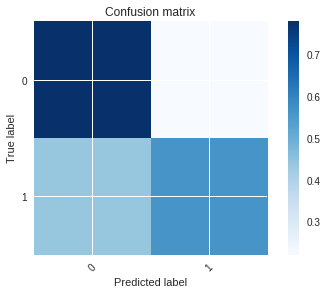

3972/3972 [==============================] - 0s 104us/step
CNN (['loss', 'acc'], [0.902804250743574, 0.7066968781470292])


In [ ]:
acc = cnn.test_and_plot(tst_data_clean_nn,tst_labels_nn)
print('CNN',acc)

## Subtask B

### Reading data and cleaning

In [ ]:
dr_nn_b = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','B')
data_nn_b,labels_nn_b = dr_nn_b.get_labelled_data()
data_nn_b,labels_nn_b = dr_nn_b.shuffle(data_nn_b,labels_nn_b,'random')

tr_data_nn_b,tst_data_nn_b,tr_labels_nn_b,tst_labels_nn_b = split(data_nn_b,labels_nn_b,test_size=0.3)

prp = Preprocessor('remove_stopwords','lemmatize')
tr_data_clean_nn_b = prp.clean(tr_data_nn_b)
tst_data_clean_nn_b = prp.clean(tst_data_nn_b)

vct = Vectorizer('count')
vct.vectorize(tr_data_clean_nn_b)

### Training LSTM

In [ ]:
lstm_b = DeepLearner(tr_data_clean_nn_b,tr_labels_nn_b,vocab_length=vct.vocab_length,model_type='LSTM')
lstm_b.train(epochs=60)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 41, 30)            205890    
_________________________________________________________________
lstm_5 (LSTM)                (None, 200)               184800    
_________________________________________________________________
dense_10 (Dense)             (None, 41)                8241      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 84        
Total params: 399,015
Trainable params: 399,015
Non-trainable params: 0
_________________________________________________________________
Train on 2464 samples, validate on 616 samples
Epoch 1/60
2464/2464 [==============================] - 7s 3ms/step - loss: 10.2279 - acc: 0.8791 - val_loss: 0.8589 - val_acc: 0.9107
Epoch 2/60
2464/2464 [==============================] - 5s 2ms/step - loss: 0.5230 - a

### Testing LSTM and plotting

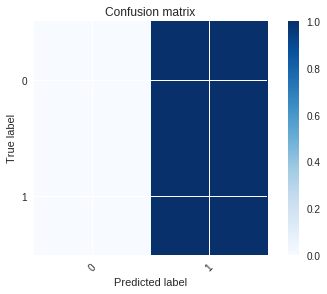

1320/1320 [==============================] - 1s 511us/step
LSTM (['loss', 'acc'], [0.3875281375465971, 0.8696969704194503])


In [ ]:
acc = lstm_b.test_and_plot(tst_data_clean_nn_b,tst_labels_nn_b)
print('LSTM',acc)

### Training CNN

In [ ]:
cnn_b = DeepLearner(tr_data_clean_nn_b,tr_labels_nn_b,vocab_length=vct.vocab_length,model_type='CNN')
cnn_b.train(epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 41, 30)            194340    
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 37, 64)            9664      
_________________________________________________________________
dropout_7 (Dropout)          (None, 37, 64)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 35, 32)            6176      
_________________________________________________________________
dropout_8 (Dropout)          (None, 35, 32)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 33, 16)            1552      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 6, 16)             0         
__________

### Testing CNN and plotting

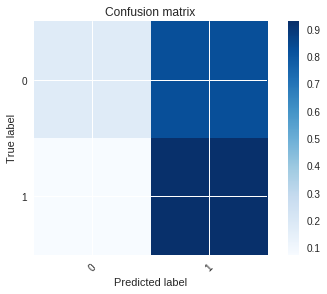

1320/1320 [==============================] - 0s 92us/step
CNN (['loss', 'acc'], [0.5748191519217057, 0.8287878795103594])


In [ ]:
acc = cnn_b.test_and_plot(tst_data_clean_nn_b,tst_labels_nn_b)
print('CNN',acc)

## Subtask C

### Reading data and cleaning

In [ ]:
dr_nn_c = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','C')
data_nn_c,labels_nn_c = dr_nn_c.get_labelled_data()
data_nn_c,labels_nn_c = dr_nn_c.shuffle(data_nn_c,labels_nn_c,'random')

tr_data_nn_c,tst_data_nn_c,tr_labels_nn_c,tst_labels_nn_c = split(data_nn_c,labels_nn_c,test_size=0.3)

prp = Preprocessor('remove_stopwords','lemmatize')
tr_data_clean_nn_c = prp.clean(tr_data_nn_c)
tst_data_clean_nn_c = prp.clean(tst_data_nn_c)

vct = Vectorizer('count')
vct.vectorize(tr_data_clean_nn_c)

### Training LSTM

In [ ]:
lstm_c = DeepLearner(tr_data_clean_nn_c,tr_labels_nn_c,vocab_length=vct.vocab_length,model_type='LSTM')
lstm_c.train(epochs=60)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 34, 30)            194340    
_________________________________________________________________
lstm_6 (LSTM)                (None, 200)               184800    
_________________________________________________________________
dense_13 (Dense)             (None, 34)                6834      
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 105       
Total params: 386,079
Trainable params: 386,079
Non-trainable params: 0
_________________________________________________________________
Train on 2170 samples, validate on 543 samples
Epoch 1/60
2170/2170 [==============================] - 6s 3ms/step - loss: 10.4619 - acc: 0.6166 - val_loss: 1.7580 - val_acc: 0.6280
Epoch 2/60
2170/2170 [==============================] - 4s 2ms/step - loss: 1.1254 - a

### Testing LSTM and plotting

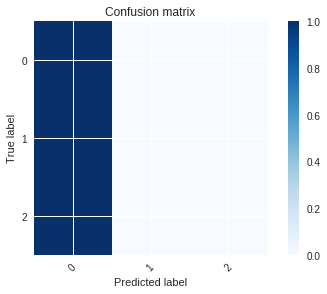

1163/1163 [==============================] - 1s 456us/step
LSTM (['loss', 'acc'], [0.8934729131049158, 0.6259673260863444])


In [ ]:
acc = lstm_c.test_and_plot(tst_data_clean_nn_c,tst_labels_nn_c,3)
print('LSTM',acc)

### Training CNN

In [ ]:
cnn_c = DeepLearner(tr_data_clean_nn_c,tr_labels_nn_c,vocab_length=vct.vocab_length,model_type='CNN')
cnn_c.train(epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 34, 30)            194340    
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 30, 64)            9664      
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 28, 32)            6176      
_________________________________________________________________
dropout_10 (Dropout)         (None, 28, 32)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 26, 16)            1552      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 16)             0         
__________

### Testing CNN and plotting

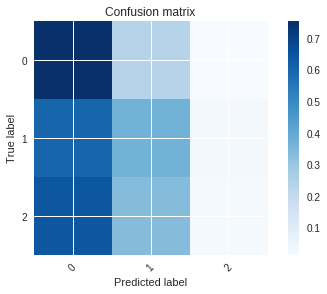

1163/1163 [==============================] - 0s 94us/step
CNN (['loss', 'acc'], [1.0960564766069578, 0.5700773862242596])


In [ ]:
acc = cnn_c.test_and_plot(tst_data_clean_nn_c,tst_labels_nn_c,3)
print('CNN',acc)